## CINDY LAUNDIYA MARETHA
## 210411100037

In [2]:
!pip install beautifulsoup4

In [3]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import csv
hades = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}

## 1. Crawling Berita

Pada proses crawling ini diambil berita melalui website detik.com dengan menggunakan kata kunci "Pemanasan Global"

In [4]:
def scrape_detik(hal, requests):
    a = 1
    # Membuka file CSV untuk menulis hasil scraping
    with open('hasil_scraping.csv', 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Judul', 'Waktu', 'Link', 'Content']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        # Menulis header ke dalam file CSV
        writer.writeheader()

        for page in range(1, hal):
            url = f'https://www.detik.com/search/searchall?query=pemanasan+global&siteid=2{page}'
            req = requests.get(url)
            sop = BeautifulSoup(req.text, 'html.parser')
            li = sop.find('div', class_='list media_rows list-berita')
            lin = li.find_all('article')

            for x in lin:
                link = x.find('a')['href']
                date = x.find('a').find('span', class_='date').text.replace('WIB','').replace('detikJatim','').split(',')[1]
                headline = x.find('a').find('h2').text

                ge_ = requests.get(link).text
                sop_ = BeautifulSoup(ge_, 'html.parser')
                content = sop_.find_all('div', class_='detail__body-text itp_bodycontent')

                for cont in content:
                    paragraphs = cont.find_all('p')
                    content_ = ''.join([p.text for p in paragraphs]).replace('\n', '').replace('ADVERTISEMENT','').replace('SCROLL TO RESUME CONTENT','')

                    data = {
                        'Judul': headline,
                        'Waktu': date,
                        'Link': link,
                        'Content': content_
                    }
                    # Menulis data ke dalam file CSV
                    writer.writerow(data)
                    print("Data berhasil ditambahkan:", data)
                    print(f'done[{a}] > {headline}')
                    a += 1

In [5]:
scrape_detik(3, requests)

Data berhasil ditambahkan: {'Judul': 'Hampir 8.000 Pelari Meriahkan Lazada Run di ICE BSD, Ada dari Kenya', 'Waktu': ' 11 Jun 2023 11:58 ', 'Link': 'https://sport.detik.com/sport-lain/d-6766479/hampir-8-000-pelari-meriahkan-lazada-run-di-ice-bsd-ada-dari-kenya', 'Content': 'Sekitar 8.000 peserta meriahkan ajang lari yang digelar Lazada Indonesia bertajuk Lazada Run di ICE BSD, Kabupaten Tangerang. Para peserta lomba lari ini tak hanya dari dalam kota, tetapi juga datang dari luar kota bahkan luar negara, salah satunya, Kenya.Chief Marketing Officer Lazada Indonesia mengatakan untuk kategori kegiatan ini dibagi menjadi 5K, 10K, dan 21K. Semuanya terbuka untuk umum dan masyarakat."Pesertanya kita terbuka untuk semua. Mau yang sport enthusiast, professional runners, anak-anak, community running, atau yang memang ingin mendapatkan experience di Lazada Run," ujar Intan pada detikcom, Minggu (11/6/2023).\r\r\rSCROLL TO CONTINUE WITH CONTENT\rIntan melanjutkan kegiatan ini digelar untuk mendo

## Tampilan Data hasil Crawling Berita

In [6]:
import pandas as pd
df = pd.read_csv('/content/hasil_scraping.csv')
df

,Judul,Waktu,Link,Content
0,Hampir 8.000 Pelari Meriahkan Lazada Run di IC...,11 Jun 2023 11:58,https://sport.detik.com/sport-lain/d-6766479/h...,Sekitar 8.000 peserta meriahkan ajang lari yan...
1,"Hari Lari Sedunia, 200 Pelari Ikut Fun Run Und...",01 Jun 2022 11:17,https://sport.detik.com/sport-lain/d-6105077/h...,Brand apparel olahraga Under Armour mengadakan...
2,"PBSI Maklum Singapore Open Batal, tapi...",13 Mei 2021 15:25,https://sport.detik.com/raket/d-5568632/pbsi-m...,PP PBSI menilai wajar keputusan Badminton Worl...
3,"Kualifikasi Olimpiade Mulai 2021, Richard Main...",04 Jun 2020 14:29,https://sport.detik.com/raket/d-5040253/kualif...,Pelatih bulutangkis ganda campuran Richard Mai...
4,"Piala Thomas dan Uber 2020 Jadi Oktober, PBSI:...",29 Apr 2020 22:25,https://sport.detik.com/raket/d-4996515/piala-...,PP PBSI merespons keputusan Badminton World Fe...
5,"Liga Equestrian Digelar Akhir Pekan Ini, Ada 1...",13 Des 2019 00:00,https://sport.detik.com/sport-lain/d-4820926/l...,"\r\r\rSCROLL TO CONTINUE WITH CONTENT\r""Equina..."
6,Begini Cara Pegolf Lokal Cari Pengalaman,17 Des 2017 22:50,https://sport.detik.com/sport-lain/d-3773992/b...,\r\r\rSCROLL TO CONTINUE WITH CONTENT\r
7,Yang Perlu Diperbaiki Agar INASGOC Lebih Siap ...,28 Nov 2017 13:55,https://sport.detik.com/sport-lain/d-3746594/y...,\r\r\rSCROLL TO CONTINUE WITH CONTENT\r
8,Pembukaan Olimpiade Rio: Tampilkan Favela dan ...,06 Agu 2016 11:20,https://sport.detik.com/sport-lain/d-3269718/p...,Awesome ð #OpeningCeremony #Rio2016 #olympi...


In [7]:
%%capture
!pip install nltk
!pip install Sastrawi

In [8]:
import pandas as pd
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
# tokenizer = RegexpTokenizer(r'\w+')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import OneHotEncoder

In [9]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
df = df.astype(str)
df["Content"] = df["Content"].apply(lambda x: x.lower())

content_column = df["Content"]
konten = pd.DataFrame(content_column, columns=['Content'])
konten

,Content
0,sekitar 8.000 peserta meriahkan ajang lari yan...
1,brand apparel olahraga under armour mengadakan...
2,pp pbsi menilai wajar keputusan badminton worl...
3,pelatih bulutangkis ganda campuran richard mai...
4,pp pbsi merespons keputusan badminton world fe...
5,"\r\r\rscroll to continue with content\r""equina..."
6,\r\r\rscroll to continue with content\r
7,\r\r\rscroll to continue with content\r
8,awesome ð #openingceremony #rio2016 #olympi...


## Dokumen 1

In [11]:
import pandas as pd

# Ambil satu dokumen dari baris pertama
dokumen_pertama = df.at[0, 'Content']

# Buat DataFrame dengan satu kolom dan satu baris
df_dokumen = pd.DataFrame({'Dokumen1': [dokumen_pertama]})

# Tampilkan DataFrame
df_dokumen



,Dokumen1
0,sekitar 8.000 peserta meriahkan ajang lari yan...


## 1. Ekstraksi Kalimat pada Berita 1

Pada proses ekstraksi kalimat dilakukan tokenisasi kalimat yang ada di dalam dokumen berita

In [12]:
from nltk.tokenize import sent_tokenize

# Misalnya, jika df adalah DataFrame yang memiliki kolom 'Content'
teks_berita = df_dokumen['Dokumen1'].values.tolist()

kalimat = []
for teks in teks_berita:
    kalimat.extend(sent_tokenize(teks))

df_kalimat = pd.DataFrame(kalimat, columns=['Tokenisasi'])
df_kalimat

,Tokenisasi
0,sekitar 8.000 peserta meriahkan ajang lari yan...
1,para peserta lomba lari ini tak hanya dari dal...
2,semuanya terbuka untuk umum dan masyarakat.
3,"""pesertanya kita terbuka untuk semua."
4,"mau yang sport enthusiast, professional runner..."
5,scroll to continue with content\rintan melanju...
6,"karena mencakup semua masyarakat, kegiatan ini..."
7,harapannya yang bisa sehat bukan hanya individ...
8,"""kemudian kita ingin berkontribusi, terutama d..."
9,salah satunya adalah melalui kegiatan lazada run.


## Menghilangkan Kata-kata dan Tanda baca tidak penting

In [13]:
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import string

# Misalnya, jika df adalah DataFrame yang memiliki kolom 'Content'
teks_berita = df_dokumen['Dokumen1'].values.tolist()

kalimat = []
for teks in teks_berita:
    # Tokenisasi
    kalimat.extend(sent_tokenize(teks))

# Membuang kata-kata atau tanda baca yang tidak penting
stopwords_list = set(stopwords.words('english'))
cleaned_sentences = []

for sentence in kalimat:
    # Menghapus tanda baca
    sentence = sentence.translate(str.maketrans("", "", string.punctuation))

    # Menghapus angka
    sentence = ''.join([char for char in sentence if not char.isdigit()])

    # Mengubah teks menjadi huruf kecil
    sentence = sentence.lower()

    # Membuang kata-kata yang merupakan stopwords
    words = sentence.split()
    words = [word for word in words if word not in stopwords_list]

    # Menggabungkan kata-kata kembali menjadi kalimat
    cleaned_sentence = " ".join(words)

    cleaned_sentences.append(cleaned_sentence)

# Membuat DataFrame baru
df_cleaned1 = pd.DataFrame(cleaned_sentences, columns=['Tokenisasi Dokumen1'])
df_cleaned1

,Tokenisasi Dokumen1
0,sekitar peserta meriahkan ajang lari yang dige...
1,para peserta lomba lari ini tak hanya dari dal...
2,semuanya terbuka untuk umum dan masyarakat
3,pesertanya kita terbuka untuk semua
4,mau yang sport enthusiast professional runners...
5,scroll continue content intan melanjutkan kegi...
6,karena mencakup semua masyarakat kegiatan ini ...
7,harapannya yang bisa sehat bukan hanya individ...
8,kemudian kita ingin berkontribusi terutama dar...
9,salah satunya adalah melalui kegiatan lazada run


## 2. Menghitung Nilai TF-IDF dari Dokumen Berita 1

Proses TF-IDF ini digunakan untuk mengetahui seberapa sering suatu kata muncul didalam dokumen. Berikut rumus perhitungan TF-IDF


$$
\begin{gathered}
w_{i j}=t f_{i j} x i d f_j \\
w_{i j}=t f_{i j} x \log \left(D / d f_j\right)
\end{gathered}
$$



Dimana Wij merupakan bobot dari term(j) terhadapn dokumen(i). Sedangkan tfij merupakan jumlah kemunculan term(j) dalam dokumen(i). Untuk D sendiri merupakan jumlah semua dokumen yang ada pada data dan dfj merupakan jumlah dokumen yang mengandung term(j)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Data kalimat (contoh)
kalimat = df_cleaned1['Tokenisasi Dokumen1']

# Membuat objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menghitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(kalimat)

# Mengonversi matriks TF-IDF ke DataFrame Pandas
tfidf_kata1 = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Menampilkan tabel TF-IDF
tfidf_kata1

,acaranya,ada,adalah,aja,ajang,akan,anakanak,antusias,antusiasme,apa,...,ucap,ujar,umum,ungkap,untuk,vietnam,vinsensius,vinsensiusmelihat,wisata,yang
0,0.000000,0.00000,0.000000,0.00000,0.29658,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.167853
1,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.102965,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.493895,0.00000,0.266830,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.287165,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.229011,0.000000,0.00000,0.000000,...,0.000000,0.229011,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.259223
5,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.175644,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.202226
8,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091132
9,0.000000,0.00000,0.429424,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 3. Cosinuss Similarity pada Dokumen 1

Proses ini digunakan untuk mengukur jarak kedekatan antar dokumen dan diperoleh rumus sebagai berikut.

$$
\cos \theta=\frac{a \cdot b}{\|a\| \cdot\|b\|}
$$

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung kesamaan kosinus antara kalimat-kalimat
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Menampilkan matriks kesamaan kosinus
cosine_sim_df1 = pd.DataFrame(cosine_sim_matrix, columns=df_cleaned1.index, index=df_cleaned1.index)
cosine_sim_df1

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.000000,0.105866,0.000000,0.000000,0.124813,0.037802,0.044076,0.123862,0.079240,0.132162,...,0.053138,0.000000,0.078561,0.122321,0.057429,0.043453,0.028543,0.000000,0.261593,0.143458
1,0.105866,1.000000,0.060728,0.029568,0.010703,0.071772,0.103548,0.145574,0.153927,0.158091,...,0.243644,0.121827,0.050484,0.022846,0.184108,0.045984,0.083919,0.130624,0.128471,0.022357
2,0.000000,0.060728,1.000000,0.284872,0.000000,0.153018,0.123767,0.000000,0.000000,0.000000,...,0.032940,0.101574,0.000000,0.000000,0.000000,0.000000,0.056031,0.046598,0.035443,0.000000
3,0.000000,0.029568,0.284872,1.000000,0.000000,0.050439,0.159831,0.000000,0.113162,0.000000,...,0.035451,0.049455,0.000000,0.000000,0.000000,0.000000,0.060301,0.000000,0.000000,0.000000
4,0.124813,0.010703,0.000000,0.000000,1.000000,0.059062,0.000000,0.081330,0.148080,0.072391,...,0.000000,0.000000,0.000000,0.067001,0.039879,0.000000,0.000000,0.000000,0.146197,0.164911
5,0.037802,0.071772,0.153018,0.050439,0.059062,1.000000,0.197093,0.076796,0.069215,0.038778,...,0.062256,0.030249,0.000000,0.000000,0.096529,0.000000,0.071390,0.068875,0.096525,0.050026
6,0.044076,0.103548,0.123767,0.159831,0.000000,0.197093,1.000000,0.000000,0.000000,0.045213,...,0.096405,0.068495,0.000000,0.000000,0.112548,0.000000,0.040233,0.000000,0.112543,0.058328
7,0.123862,0.145574,0.000000,0.000000,0.081330,0.076796,0.000000,1.000000,0.225818,0.000000,...,0.052305,0.000000,0.000000,0.000000,0.031111,0.033861,0.022243,0.030566,0.164565,0.062872
8,0.079240,0.153927,0.000000,0.113162,0.148080,0.069215,0.000000,0.225818,1.000000,0.020855,...,0.065363,0.000000,0.000000,0.019302,0.035695,0.030519,0.020047,0.055977,0.090160,0.038166
9,0.132162,0.158091,0.000000,0.000000,0.072391,0.038778,0.045213,0.000000,0.020855,1.000000,...,0.027255,0.000000,0.000000,0.154519,0.222695,0.000000,0.023180,0.155088,0.345377,0.108423


Kata Penting pada setiap Kalimat berdasarkan nilai TF-IDF pada Dokumen Berita 1

In [16]:
# Menampilkan kata-kata dengan nilai TF-IDF tertinggi untuk setiap dokumen
for i, row in tfidf_kata1.iterrows():
    print(f"Kata-kata penting dalam Ringkasan Berita pada Kalimat {i + 1}:")
    top_keywords = row.sort_values(ascending=False).head(5)  # Ganti 5 dengan jumlah kata-kata penting yang diinginkan
    print(top_keywords)
    print("\n")

Kata-kata penting dalam Ringkasan Berita pada Kalimat 1:
ajang        0.29658
tangerang    0.29658
bertajuk     0.29658
kabupaten    0.29658
meriahkan    0.29658
Name: 0, dtype: float64


Kata-kata penting dalam Ringkasan Berita pada Kalimat 2:
kota       0.381169
luar       0.339489
dari       0.268237
ini        0.215727
officer    0.190584
Name: 1, dtype: float64


Kata-kata penting dalam Ringkasan Berita pada Kalimat 3:
semuanya      0.493895
umum          0.493895
terbuka       0.439889
masyarakat    0.401571
dan           0.293559
Name: 2, dtype: float64


Kata-kata penting dalam Ringkasan Berita pada Kalimat 4:
pesertanya    0.531533
terbuka       0.473411
semua         0.473411
kita          0.432173
untuk         0.287165
Name: 3, dtype: float64


Kata-kata penting dalam Ringkasan Berita pada Kalimat 5:
yang          0.259223
enthusiast    0.229011
community     0.229011
memang        0.229011
running       0.229011
Name: 4, dtype: float64


Kata-kata penting dalam Ringkasan B

## 4. Graph Kata Penting berdasarkan nilai TF-IDF pada Dokumen 1

Grap disini dibuat untuk menggambarkan nilai jarak antara kata satu dengan kata yang lain berdasarkan nilai Cosinuss Similarity dari Dokumen berita 1

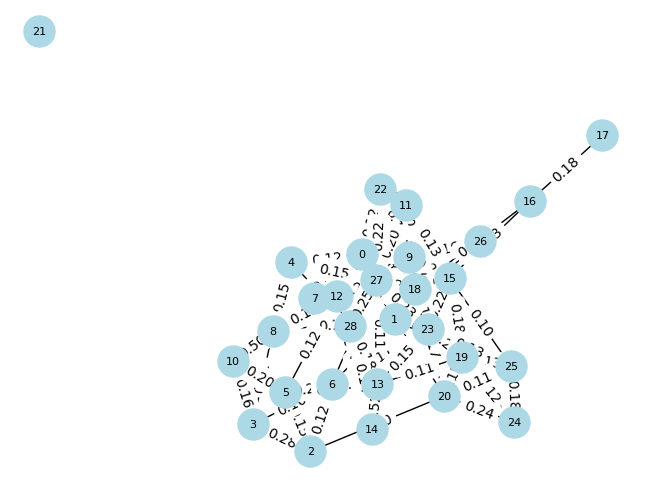

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat grafik jaringan
G = nx.Graph()

# Menambahkan simpul (kalimat)
for i in range(len(cosine_sim_matrix)):
    G.add_node(i, label=df_cleaned1.index[i])  # Menggunakan label kalimat

# Menambahkan tepian (hubungan) berdasarkan kesamaan kosinus
for i in range(len(cosine_sim_matrix)):
    for j in range(i+1, len(cosine_sim_matrix)):
        similarity = cosine_sim_matrix[i][j]
        if similarity > 0.1:  # Atur threshold sesuai kebutuhan
            G.add_edge(i, j, weight=similarity)

# Menggambar grafik jaringan
pos = nx.spring_layout(G, seed=42)  # Menggunakan layout spring
labels = nx.get_node_attributes(G, 'label')

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): f"{similarity:.2f}" for i, j, similarity in G.edges(data='weight')})

plt.show()

## 5. Closeness Centrality Dokumen Berita 1

Pada proses ini Closeness Centrality digunakan untuk menghitung bobot sebuah node berdasarkan jumlah jarak terpendek antara node(i) dengan node lainnya. Berikut rumus Closeness Centrality


$$
C_c(i)=\frac{n-1}{\sum_{j=1}^n d(i, j)}
$$

In [18]:
import networkx as nx

closeness_centrality = nx.closeness_centrality(G)

sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

for node, closeness in sorted_closeness:
    print(f"Simpul {node}: Closeness Centrality = {closeness:.4f}")

Simpul 27: Closeness Centrality = 0.6199
Simpul 1: Closeness Centrality = 0.5786
Simpul 23: Closeness Centrality = 0.5540
Simpul 0: Closeness Centrality = 0.5424
Simpul 9: Closeness Centrality = 0.5313
Simpul 15: Closeness Centrality = 0.5313
Simpul 18: Closeness Centrality = 0.5313
Simpul 12: Closeness Centrality = 0.5207
Simpul 6: Closeness Centrality = 0.5105
Simpul 7: Closeness Centrality = 0.5007
Simpul 13: Closeness Centrality = 0.5007
Simpul 19: Closeness Centrality = 0.4912
Simpul 20: Closeness Centrality = 0.4734
Simpul 28: Closeness Centrality = 0.4649
Simpul 8: Closeness Centrality = 0.4568
Simpul 5: Closeness Centrality = 0.4413
Simpul 11: Closeness Centrality = 0.4413
Simpul 4: Closeness Centrality = 0.4268
Simpul 25: Closeness Centrality = 0.4199
Simpul 2: Closeness Centrality = 0.4133
Simpul 22: Closeness Centrality = 0.4068
Simpul 26: Closeness Centrality = 0.4005
Simpul 16: Closeness Centrality = 0.3945
Simpul 3: Closeness Centrality = 0.3886
Simpul 10: Closeness Centr

## 6. PageRank Dokumen 1

In [19]:
G = nx.DiGraph(nx.path_graph(4))
pr = nx.pagerank(G, alpha=0.9)
pr

{0: 0.1724140124772394,
 1: 0.3275859875227606,
 2: 0.3275859875227606,
 3: 0.1724140124772394}

## 7. EIgenVector dari Dokumen Berita 1

EigenVector digunakan untuk menghitung sentralitas sebuah node dengan menambahkan sentralitas pendahulunya. Berikut nilai persamaan dari EigenVector


$$
\lambda x_i=\sum_{j \rightarrow i} x_j
$$

In [20]:
G = nx.path_graph(4)
centrality = nx.eigenvector_centrality(G)
sorted((v, f"{c:0.2f}") for v, c in centrality.items())

[(0, '0.37'), (1, '0.60'), (2, '0.60'), (3, '0.37')]

Tampilan Kalimat penting berdasarkan nilai EigenVector pada Dokumen Berita 1

In [21]:
import networkx as nx

# Membuat grafik jaringan (contoh: grafik jalur)
G = nx.path_graph(4)

# Menghitung eigenvector centrality
centrality = nx.eigenvector_centrality(G)

# Data berita (dalam bentuk daftar)
berita =df_cleaned1['Tokenisasi Dokumen1']

# Menampilkan kalimat dari eigenvector centrality dan mengaitkannya dengan dokumen berita
for node, centrality_score in centrality.items():
    if 0 <= node < len(berita):
        kalimat = f"Kalimat berita1: '{berita[node]}' memiliki Eigenvector Centrality sebesar {centrality_score:.2f}"
        print(kalimat)

Kalimat berita1: 'sekitar peserta meriahkan ajang lari yang digelar lazada indonesia bertajuk lazada run di ice bsd kabupaten tangerang' memiliki Eigenvector Centrality sebesar 0.37
Kalimat berita1: 'para peserta lomba lari ini tak hanya dari dalam kota tetapi juga datang dari luar kota bahkan luar negara salah satunya kenyachief marketing officer lazada indonesia mengatakan untuk kategori kegiatan ini dibagi menjadi k k dan k' memiliki Eigenvector Centrality sebesar 0.60
Kalimat berita1: 'semuanya terbuka untuk umum dan masyarakat' memiliki Eigenvector Centrality sebesar 0.60
Kalimat berita1: 'pesertanya kita terbuka untuk semua' memiliki Eigenvector Centrality sebesar 0.37


## Dokumen 2

In [22]:
import pandas as pd

# Ambil satu dokumen dari baris pertama
dokumen_pertama = df.at[1, 'Content']

# Buat DataFrame dengan satu kolom dan satu baris
df_dokumen2 = pd.DataFrame({'Dokumen2': [dokumen_pertama]})

# Tampilkan DataFrame
df_dokumen2

,Dokumen2
0,brand apparel olahraga under armour mengadakan...


## 1. Ekstraksi Kalimat pada Dokumen Berita 2

In [23]:
from nltk.tokenize import sent_tokenize

# Misalnya, jika df adalah DataFrame yang memiliki kolom 'Content'
teks_berita = df_dokumen2['Dokumen2'].values.tolist()

kalimat = []
for teks in teks_berita:
    kalimat.extend(sent_tokenize(teks))

df_kalimat2 = pd.DataFrame(kalimat, columns=['Tokenisasi'])
df_kalimat2

,Tokenisasi
0,brand apparel olahraga under armour mengadakan...
1,"kegiatan yang diadakan di senayan, jakarta, in..."
2,under armour juga mengundang 11 komunitas lari.
3,"""kita undang komunitas lari."
4,sebenarnya kita cuma memberikan slot (peserta)...
5,tapi ini acaranya super sukses karena ramai ba...
6,intinya kita undang semua masyarakat untuk iku...
7,sekaligus sebagai pemanasan menghadapi challen...
8,"dikatakannya, selama fun run 4k berlangsung pe..."
9,"scroll to continue with content\r""kita menduku..."


## Menghilangkan Kata dan Tanda tidak penting pada Dokumen 2

In [24]:
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import string

# Misalnya, jika df adalah DataFrame yang memiliki kolom 'Content'
teks_berita = df_dokumen2['Dokumen2'].values.tolist()

kalimat = []
for teks in teks_berita:
    # Tokenisasi
    kalimat.extend(sent_tokenize(teks))

# Membuang kata-kata atau tanda baca yang tidak penting
stopwords_list = set(stopwords.words('english'))
cleaned_sentences = []

for sentence in kalimat:
    # Menghapus tanda baca
    sentence = sentence.translate(str.maketrans("", "", string.punctuation))

    # Menghapus angka
    sentence = ''.join([char for char in sentence if not char.isdigit()])

    # Mengubah teks menjadi huruf kecil
    sentence = sentence.lower()

    # Membuang kata-kata yang merupakan stopwords
    words = sentence.split()
    words = [word for word in words if word not in stopwords_list]

    # Menggabungkan kata-kata kembali menjadi kalimat
    cleaned_sentence = " ".join(words)

    cleaned_sentences.append(cleaned_sentence)

# Membuat DataFrame baru
df_cleaned2 = pd.DataFrame(cleaned_sentences, columns=['Tokenisasi Dokumen2'])
df_cleaned2

,Tokenisasi Dokumen2
0,brand apparel olahraga armour mengadakan kompe...
1,kegiatan yang diadakan di senayan jakarta ini ...
2,armour juga mengundang komunitas lari
3,kita undang komunitas lari
4,sebenarnya kita cuma memberikan slot peserta t...
5,tapi ini acaranya super sukses karena ramai ba...
6,intinya kita undang semua masyarakat untuk iku...
7,sekaligus sebagai pemanasan menghadapi challen...
8,dikatakannya selama fun run k berlangsung pese...
9,scroll continue content kita mendukung semua o...


## 2. TF-IDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Data kalimat (contoh)
kalimat = df_cleaned2['Tokenisasi Dokumen2']

# Membuat objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menghitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(kalimat)

# Mengonversi matriks TF-IDF ke DataFrame Pandas
tfidf_kata2 = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Menampilkan tabel TF-IDF
tfidf_kata2

,acaranya,adapun,ade,agenda,ajang,akan,amerika,anakanak,apalagi,aplikasi,...,ujar,undang,untuk,urutanranking,utama,video,waktu,window,yaitu,yang
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.289316,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.169640
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.568672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.369011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.356671,0.000000,0.178336,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.178336,0.156760,0.223345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237086
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141210
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203755


In [26]:
# Menampilkan kata-kata dengan nilai TF-IDF tertinggi untuk setiap dokumen
for i, row in tfidf_kata2.iterrows():
    print(f"Kata-kata penting dalam Dokumen Berita 2 pada Kalimat {i + 1}:")
    top_keywords = row.sort_values(ascending=False).head(5)  # Ganti 5 dengan jumlah kata-kata penting yang diinginkan
    print(top_keywords)
    print("\n")

Kata-kata penting dalam Dokumen Berita 2 pada Kalimat 1:
lari        0.404653
olahraga    0.300996
rangkap     0.300996
brand       0.300996
sedunia     0.300996
Name: 0, dtype: float64


Kata-kata penting dalam Dokumen Berita 2 pada Kalimat 2:
senayan     0.289316
jakarta     0.289316
dewasa      0.289316
anakanak    0.289316
sebanyak    0.289316
Name: 1, dtype: float64


Kata-kata penting dalam Dokumen Berita 2 pada Kalimat 3:
mengundang    0.543802
komunitas     0.478010
juga          0.431330
armour        0.395122
lari          0.365538
Name: 2, dtype: float64


Kata-kata penting dalam Dokumen Berita 2 pada Kalimat 4:
komunitas    0.568672
undang       0.568672
lari         0.434868
kita         0.405111
acaranya     0.000000
Name: 3, dtype: float64


Kata-kata penting dalam Dokumen Berita 2 pada Kalimat 5:
cuma          0.415793
memberikan    0.415793
slot          0.415793
sebenarnya    0.415793
terbatas      0.415793
Name: 4, dtype: float64


Kata-kata penting dalam Dokumen Ber

## 3. Cosinuss Similarity

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung kesamaan kosinus antara kalimat-kalimat
cosine_sim_matrix2 = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Menampilkan matriks kesamaan kosinus
cosine_sim_df2 = pd.DataFrame(cosine_sim_matrix2, columns=df_cleaned2.index, index=df_cleaned2.index)
cosine_sim_df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.000000,0.234330,0.175971,0.000000,0.000000,0.028339,0.000000,0.045604,0.000000,0.138945,0.054348,0.000000,0.000000,0.080621,0.000000,0.000000,0.000000,0.000000,0.117923
1,0.000000,1.000000,0.000000,0.000000,0.047170,0.036705,0.095177,0.040219,0.051276,0.112246,0.076575,0.101994,0.104481,0.033222,0.096843,0.178812,0.000000,0.000000,0.000000,0.062455
2,0.234330,0.000000,1.000000,0.430792,0.000000,0.000000,0.051199,0.000000,0.000000,0.000000,0.123103,0.000000,0.000000,0.000000,0.000000,0.000000,0.131770,0.000000,0.000000,0.106524
3,0.175971,0.000000,0.430792,1.000000,0.105478,0.000000,0.134385,0.000000,0.000000,0.088153,0.061216,0.000000,0.000000,0.000000,0.000000,0.000000,0.097706,0.000000,0.108934,0.058443
4,0.000000,0.047170,0.000000,0.105478,1.000000,0.000000,0.029076,0.000000,0.039265,0.056656,0.000000,0.000000,0.052196,0.047745,0.048897,0.000000,0.062796,0.000000,0.070012,0.000000
5,0.000000,0.036705,0.000000,0.000000,0.000000,1.000000,0.045250,0.000000,0.000000,0.000000,0.000000,0.029647,0.040616,0.000000,0.000000,0.037528,0.000000,0.000000,0.000000,0.025365
6,0.028339,0.095177,0.051199,0.134385,0.029076,0.045250,1.000000,0.000000,0.022674,0.072183,0.178788,0.028656,0.039257,0.068527,0.082857,0.110831,0.070146,0.000000,0.030029,0.126400
7,0.000000,0.040219,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.033479,0.048308,0.094540,0.000000,0.000000,0.000000,0.000000,0.041121,0.000000,0.000000,0.000000,0.027794
8,0.045604,0.051276,0.000000,0.000000,0.039265,0.000000,0.022674,0.033479,1.000000,0.028772,0.075695,0.035406,0.078736,0.119378,0.124384,0.024492,0.143340,0.000000,0.000000,0.016554
9,0.000000,0.112246,0.000000,0.088153,0.056656,0.000000,0.072183,0.048308,0.028772,1.000000,0.025020,0.000000,0.000000,0.000000,0.000000,0.035340,0.052482,0.000000,0.058512,0.023886


## 4. Graph

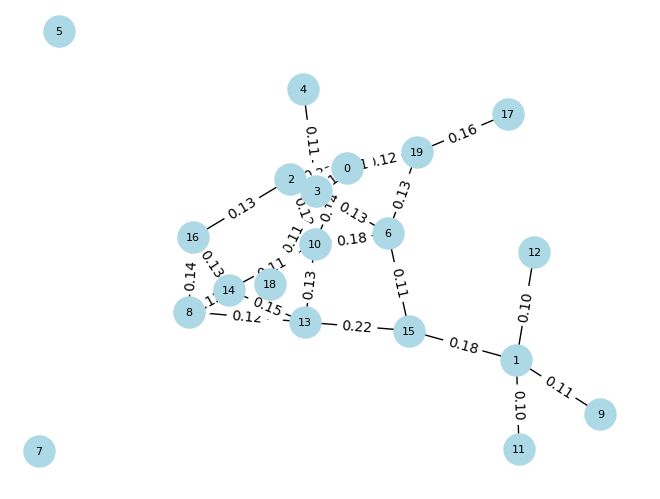

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat grafik jaringan
G = nx.Graph()

# Menambahkan simpul (kalimat)
for i in range(len(cosine_sim_matrix2)):
    G.add_node(i, label=df_cleaned2.index[i])  # Menggunakan label kalimat

# Menambahkan tepian (hubungan) berdasarkan kesamaan kosinus
for i in range(len(cosine_sim_matrix2)):
    for j in range(i+1, len(cosine_sim_matrix2)):
        similarity = cosine_sim_matrix2[i][j]
        if similarity > 0.1:  # Atur threshold sesuai kebutuhan
            G.add_edge(i, j, weight=similarity)

# Menggambar grafik jaringan
pos = nx.spring_layout(G, seed=42)  # Menggunakan layout spring
labels = nx.get_node_attributes(G, 'label')

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): f"{similarity:.2f}" for i, j, similarity in G.edges(data='weight')})

plt.show()

## 5. Closeness Centrality

In [29]:
import networkx as nx

closeness_centrality = nx.closeness_centrality(G)

sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

for node, closeness in sorted_closeness:
    print(f"Simpul {node}: Closeness Centrality = {closeness:.4f}")

Simpul 6: Closeness Centrality = 0.4346
Simpul 15: Closeness Centrality = 0.4111
Simpul 10: Closeness Centrality = 0.3900
Simpul 3: Closeness Centrality = 0.3803
Simpul 2: Closeness Centrality = 0.3710
Simpul 13: Closeness Centrality = 0.3710
Simpul 19: Closeness Centrality = 0.3622
Simpul 0: Closeness Centrality = 0.3537
Simpul 14: Closeness Centrality = 0.3380
Simpul 1: Closeness Centrality = 0.3236
Simpul 16: Closeness Centrality = 0.3236
Simpul 8: Closeness Centrality = 0.3169
Simpul 4: Closeness Centrality = 0.2716
Simpul 18: Closeness Centrality = 0.2716
Simpul 17: Closeness Centrality = 0.2623
Simpul 9: Closeness Centrality = 0.2414
Simpul 11: Closeness Centrality = 0.2414
Simpul 12: Closeness Centrality = 0.2414
Simpul 5: Closeness Centrality = 0.0000
Simpul 7: Closeness Centrality = 0.0000


## 6. PageRank

In [30]:
G = nx.DiGraph(nx.path_graph(4))
pr = nx.pagerank(G, alpha=0.9)
pr

{0: 0.1724140124772394,
 1: 0.3275859875227606,
 2: 0.3275859875227606,
 3: 0.1724140124772394}

## 7. EigenVector

In [31]:
G = nx.path_graph(4)
centrality = nx.eigenvector_centrality(G)
sorted((v, f"{c:0.2f}") for v, c in centrality.items())

[(0, '0.37'), (1, '0.60'), (2, '0.60'), (3, '0.37')]

Kalimat penting pada Dokumen 2 berdasarkan nilai EigenVector

In [32]:
import networkx as nx

# Membuat grafik jaringan (contoh: grafik jalur)
G = nx.path_graph(4)

# Menghitung eigenvector centrality
centrality = nx.eigenvector_centrality(G)

# Data berita (dalam bentuk daftar)
berita =df_cleaned2['Tokenisasi Dokumen2']

# Menampilkan kalimat dari eigenvector centrality dan mengaitkannya dengan dokumen berita
for node, centrality_score in centrality.items():
    if 0 <= node < len(berita):
        kalimat = f"Kalimat berita2: '{berita[node]}' memiliki Eigenvector Centrality sebesar {centrality_score:.2f}"
        print(kalimat)

Kalimat berita2: 'brand apparel olahraga armour mengadakan kompetisi lari mile dalam rangkap hari lari sedunia' memiliki Eigenvector Centrality sebesar 0.37
Kalimat berita2: 'kegiatan yang diadakan di senayan jakarta ini diikuti sebanyak peserta mulai dari orang dewasa hingga anakanak' memiliki Eigenvector Centrality sebesar 0.60
Kalimat berita2: 'armour juga mengundang komunitas lari' memiliki Eigenvector Centrality sebesar 0.60
Kalimat berita2: 'kita undang komunitas lari' memiliki Eigenvector Centrality sebesar 0.37
